In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras

from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Cargar CIFAR-10 desde Keras
(cifar_train, cifar_train_label), (cifar_test, cifar_test_label) = keras.datasets.cifar10.load_data()

print("Shape de train images:", cifar_train.shape)
print("Shape de test images:", cifar_test.shape)
print("Shape de labels train:", cifar_train_label.shape)
print("Shape de labels test:", cifar_test_label.shape)


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Shape de train images: (50000, 32, 32, 3)
Shape de test images: (10000, 32, 32, 3)
Shape de labels train: (50000, 1)
Shape de labels test: (10000, 1)


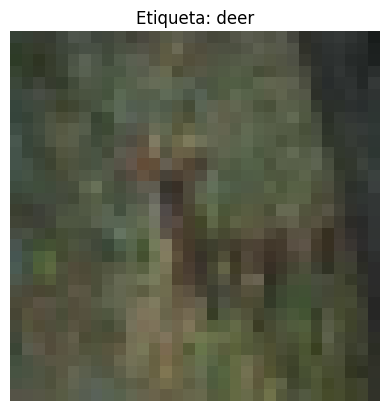

In [2]:

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

index = 10

plt.imshow(cifar_train[index])
plt.title(f"Etiqueta: {class_names[cifar_train_label[index][0]]}")
plt.axis("off")
plt.show()


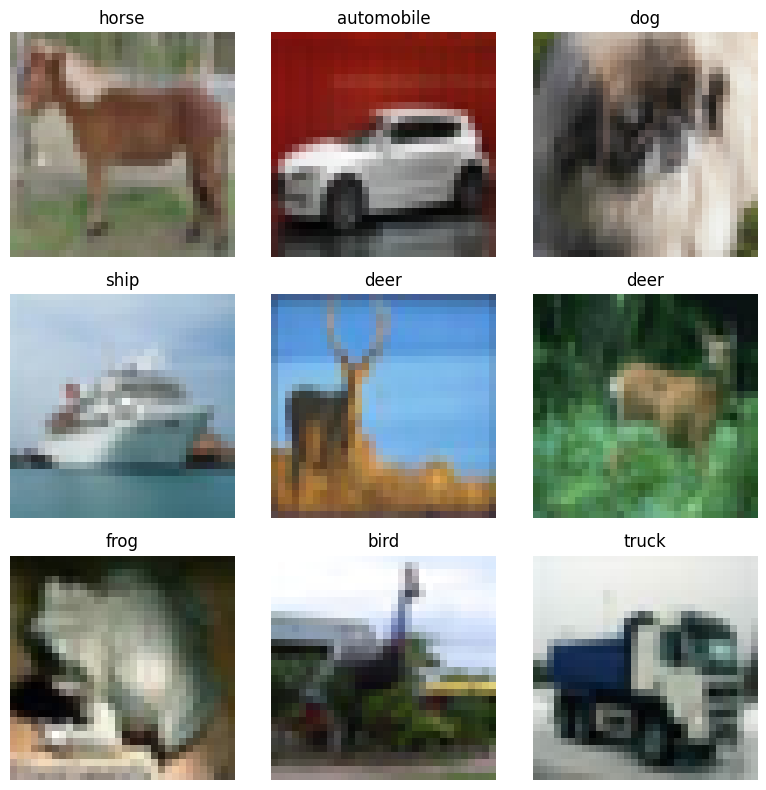

In [3]:
import random

plt.figure(figsize=(8,8))
for i in range(9):
    ax = plt.subplot(3,3,i+1)
    random_index = random.randint(0, len(cifar_train)-1)
    plt.imshow(cifar_train[random_index])
    plt.title(class_names[cifar_train_label[random_index][0]])
    plt.axis("off")

plt.tight_layout()
plt.show()


In [4]:
cifar_train = cifar_train.astype("float32") / 255.0
cifar_test  = cifar_test.astype("float32") / 255.0

print("Ejemplo de etiqueta:", cifar_train_label[0])


Ejemplo de etiqueta: [6]


In [5]:

input_shape = cifar_train.shape[1:]  # (32, 32, 3)

model_cnn = keras.models.Sequential([
    keras.layers.Conv2D(32, (3,3), activation="relu", padding="same", input_shape=input_shape),
    keras.layers.MaxPooling2D((2,2)),

    keras.layers.Conv2D(64, (3,3), activation="relu", padding="same"),
    keras.layers.MaxPooling2D((2,2)),

    keras.layers.Conv2D(128, (3,3), activation="relu", padding="same"),
    keras.layers.MaxPooling2D((2,2)),

    keras.layers.Flatten(),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dense(10, activation="softmax")  # 10 clases
])

model_cnn.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 356,810 (1.36 MB)

 Trainable params: 356,810 (1.36 MB)

 Non-trainable params: 0 (0.00 B)

In [6]:

model_cnn.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)


In [7]:

history = model_cnn.fit(
    cifar_train,
    cifar_train_label,
    epochs=15,
    batch_size=64,
    validation_split=0.15
)


Epoch 1/15
665/665 ━━━━━━━━━━━━━━━━━━━━ 101s 148ms/step - accuracy: 0.3528 - loss: 1.7585 - val_accuracy: 0.5845 - val_loss: 1.1774
Epoch 2/15
665/665 ━━━━━━━━━━━━━━━━━━━━ 97s 145ms/step - accuracy: 0.5993 - loss: 1.1321 - val_accuracy: 0.6300 - val_loss: 1.0569
Epoch 3/15
665/665 ━━━━━━━━━━━━━━━━━━━━ 96s 144ms/step - accuracy: 0.6692 - loss: 0.9329 - val_accuracy: 0.6609 - val_loss: 0.9916
Epoch 4/15
665/665 ━━━━━━━━━━━━━━━━━━━━ 102s 153ms/step - accuracy: 0.7212 - loss: 0.7959 - val_accuracy: 0.6964 - val_loss: 0.8768
Epoch 5/15
665/665 ━━━━━━━━━━━━━━━━━━━━ 95s 144ms/step - accuracy: 0.7591 - loss: 0.6927 - val_accuracy: 0.7187 - val_loss: 0.8198
Epoch 6/15
665/665 ━━━━━━━━━━━━━━━━━━━━ 143s 145ms/step - accuracy: 0.7847 - loss: 0.6164 - val_accuracy: 0.7239 - val_loss: 0.8278
Epoch 7/15
665/665 ━━━━━━━━━━━━━━━━━━━━ 96s 144ms/step - accuracy: 0.8142 - loss: 0.5357 - val_accuracy: 0.7263 - val_loss: 0.8253
Epoch 8/15
665/665 ━━━━━━━━━━━━━━━━━━━━ 102s 154ms/step - accuracy: 0.8375 - los

   accuracy      loss  val_accuracy  val_loss
0  0.451318  1.510921      0.584533  1.177384
1  0.619482  1.085060      0.630000  1.056947
2  0.680729  0.907232      0.660933  0.991622
3  0.726118  0.784003      0.696400  0.876803
4  0.757718  0.694701      0.718667  0.819820


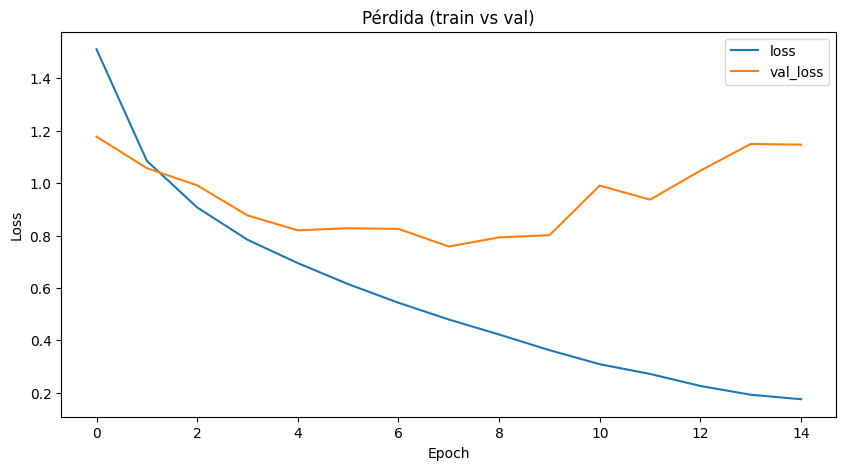

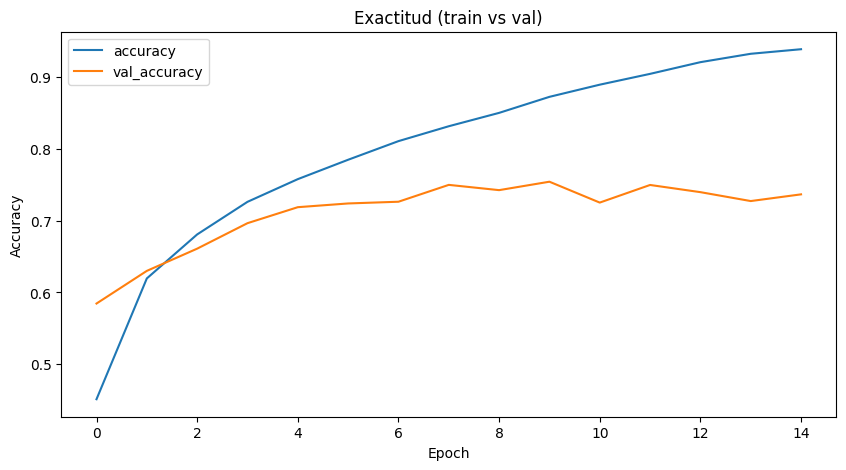

In [8]:

loss_acc_df = pd.DataFrame(history.history)
print(loss_acc_df.head())

ax = loss_acc_df[["loss", "val_loss"]].plot(figsize=(10,5), title="Pérdida (train vs val)")
ax.set_xlabel("Epoch")
ax.set_ylabel("Loss")
plt.show()

ax = loss_acc_df[["accuracy", "val_accuracy"]].plot(figsize=(10,5), title="Exactitud (train vs val)")
ax.set_xlabel("Epoch")
ax.set_ylabel("Accuracy")
plt.show()


In [9]:

test_loss, test_acc = model_cnn.evaluate(cifar_test, cifar_test_label, verbose=0)

print("Test loss:", test_loss)
print("Test accuracy:", test_acc)


Test loss: 1.2064540386199951
Test accuracy: 0.7231000065803528


313/313 ━━━━━━━━━━━━━━━━━━━━ 12s 39ms/step


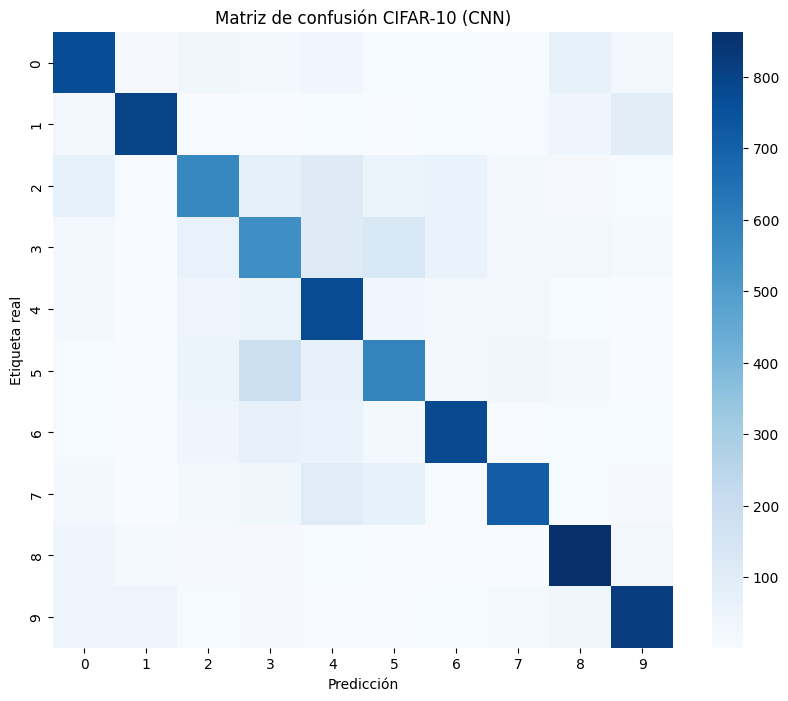

              precision    recall  f1-score   support

    airplane       0.74      0.77      0.75      1000
  automobile       0.90      0.80      0.85      1000
        bird       0.67      0.58      0.62      1000
         cat       0.53      0.55      0.54      1000
        deer       0.60      0.77      0.68      1000
         dog       0.64      0.59      0.62      1000
        frog       0.79      0.78      0.78      1000
       horse       0.83      0.71      0.77      1000
        ship       0.78      0.86      0.82      1000
       truck       0.79      0.82      0.81      1000

    accuracy                           0.72     10000
   macro avg       0.73      0.72      0.72     10000
weighted avg       0.73      0.72      0.72     10000



In [10]:

y_pred_proba = model_cnn.predict(cifar_test)
y_pred = np.argmax(y_pred_proba, axis=1)

y_true = cifar_test_label.flatten()

cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=False, cmap="Blues")
plt.xlabel("Predicción")
plt.ylabel("Etiqueta real")
plt.title("Matriz de confusión CIFAR-10 (CNN)")
plt.show()

print(classification_report(y_true, y_pred, target_names=class_names))


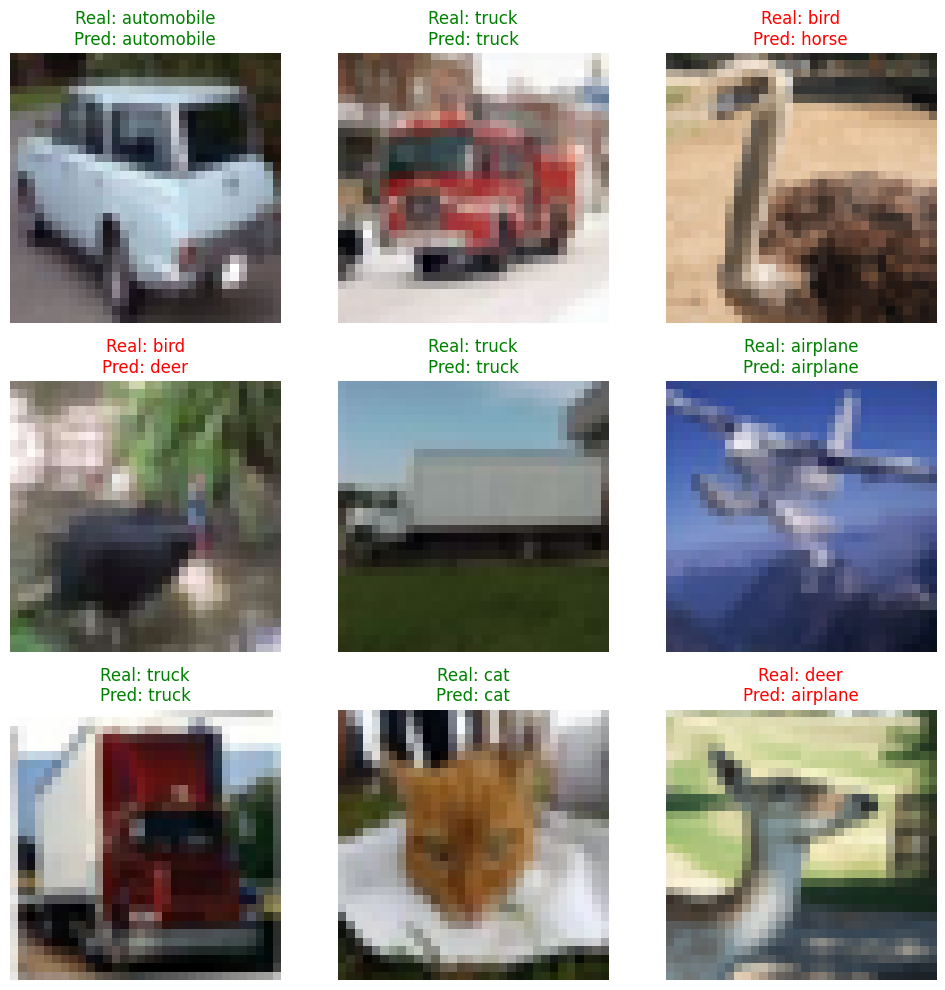

In [11]:

num_examples = 9
plt.figure(figsize=(10,10))

indices = np.random.choice(len(cifar_test), num_examples, replace=False)

for i, idx in enumerate(indices):
    ax = plt.subplot(3,3,i+1)
    plt.imshow(cifar_test[idx])
    true_label = class_names[y_true[idx]]
    pred_label = class_names[y_pred[idx]]
    color = "green" if true_label == pred_label else "red"
    plt.title(f"Real: {true_label}\nPred: {pred_label}", color=color)
    plt.axis("off")

plt.tight_layout()
plt.show()
